# Prediksi Kuantitas Penjualan Barang dengan Random Forest
- **Nama Lengkap:** Dicky Pranata  
- **NIM:** A11.2022.14615 
- **Mata Kuliah:** Pembelajaran Mesin
- **Kelompok:** A11.4412


## Ringkasan
Project ini bertujuan untuk memprediksi kuantitas penjualan barang berdasarkan data historis. Prediksi ini diharapkan dapat membantu dalam perencanaan dan pengambilan keputusan terkait stok barang.

## Permasalahan
Permasalahan utama adalah bagaimana memanfaatkan data historis penjualan untuk memprediksi kuantitas penjualan di masa depan.

## Tujuan
1. Mengembangkan model Machine Learning untuk memprediksi kuantitas penjualan.
2. Mengevaluasi performa model dengan metrik yang sesuai.

## Alur Penyelesaian
1. Pemahaman dan eksplorasi dataset.
2. Pra-pemrosesan data dan pembuatan fitur.
3. Pemodelan dan evaluasi.
4. Visualisasi hasil.

```mermaid
graph TD
    A[Load Dataset] --> B[Convert 'tanggal' to datetime]
    B --> C[Pivot Dataset]
    C --> D[Create Additional Features]
    D --> E[Create Seasonal Features]
    E --> F[Create Time Transformation Features]
    F --> G[Create Lagged Features]
    G --> H[Create Moving Average Features]
    H --> I[Create Daily Change Features]
    I --> J[Create Seasonal Weekend Feature]
    J --> K[Create Interaction Features]
    K --> L[Create Rolling Statistics Features]
    L --> M[Create Log Transformation Feature]
    M --> N[Drop NaN Values]
    N --> O[Extract Features and Target]
    O --> P[Split Data into Train and Test]
    P --> Q[Train Initial Random Forest Model]
    Q --> R[Predict with Initial Model]
    R --> S[Evaluate Initial Model]
    S --> T[Hyperparameter Tuning with Grid Search]
    T --> U[Train Best Model]
    U --> V[Predict with Best Model]
    V --> W[Evaluate Best Model]
    W --> X[Visualize Predictions vs Actual Values]
    X --> Y[Add Prediction Column to Dataset]
    Y --> Z[Visualize Predictions and Actual Values Over Time]
```


# Penjelasan Dataset, EDA, dan Proses Features Dataset

### 1. Penjelasan Dataset
Dataset yang digunakan adalah data penjualan barang dari beberapa toko yang mencakup berbagai jenis barang seperti beras, daging, minyak goreng, dan tepung. Setiap baris dalam dataset mencatat transaksi penjualan dengan informasi tanggal, nama toko, nama barang, kuantitas barang yang dijual, dan harga total.

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [114]:
# Memuat dataset dari file CSV
df = pd.read_csv('Dataset/penjualan_barang.csv')

In [115]:
df = pd.read_csv('Dataset/penjualan_barang.csv')
print (df)

      Unnamed: 0     tanggal           nama.pembeli nama.barang  kuantum  \
0              1  2020-01-02       TOKO HERUNIAWATI       BERAS   1000.0   
1              2  2020-01-02       TOKO HERUNIAWATI      DAGING    120.0   
2              3  2020-01-02  TOKO APRILIA SUKRISNI       BERAS   6000.0   
3              4  2020-01-02  TOKO APRILIA SUKRISNI       MIGOR    408.0   
4              5  2020-01-02  TOKO APRILIA SUKRISNI      TEPUNG    140.0   
...          ...         ...                    ...         ...      ...   
1284        1285  2021-04-08        TOKO MAJU TERUS      DAGING     60.0   
1285        1286  2021-04-08            TOKO KINORA       BERAS    250.0   
1286        1287  2021-04-08            TOKO KINORA      TEPUNG    120.0   
1287        1288  2021-04-09  TOKO BERKAH DUA PUTRA        GULA    100.0   
1288        1289  2021-04-09  TOKO BERKAH DUA PUTRA      DAGING     80.0   

         nominal  
0      9840000.0  
1      8400000.0  
2     62910000.0  
3      4855

In [116]:
df.describe()

,Unnamed: 0,kuantum,nominal
count,1289.000000,1289.000000,1.289000e+03
mean,645.000000,1735.063615,1.929970e+07
std,372.246558,6300.788118,6.489967e+07
min,1.000000,2.000000,4.600000e+04
25%,323.000000,140.000000,2.964000e+06
50%,645.000000,600.000000,7.650000e+06
75%,967.000000,1800.000000,1.890000e+07
max,1289.000000,200000.000000,2.047000e+09


In [117]:
df.head()

,Unnamed: 0,tanggal,nama.pembeli,nama.barang,kuantum,nominal
0,1,2020-01-02,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2,2020-01-02,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,3,2020-01-02,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,4,2020-01-02,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,5,2020-01-02,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0


In [118]:
df.tail()

,Unnamed: 0,tanggal,nama.pembeli,nama.barang,kuantum,nominal
1284,1285,2021-04-08,TOKO MAJU TERUS,DAGING,60.0,4389600.0
1285,1286,2021-04-08,TOKO KINORA,BERAS,250.0,2718750.0
1286,1287,2021-04-08,TOKO KINORA,TEPUNG,120.0,1065120.0
1287,1288,2021-04-09,TOKO BERKAH DUA PUTRA,GULA,100.0,1200000.0
1288,1289,2021-04-09,TOKO BERKAH DUA PUTRA,DAGING,80.0,5852800.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1289 non-null   int64  
 1   tanggal       1289 non-null   object 
 2   nama.pembeli  1289 non-null   object 
 3   nama.barang   1289 non-null   object 
 4   kuantum       1289 non-null   float64
 5   nominal       1289 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.6+ KB


In [120]:
df.columns

Index(['Unnamed: 0', 'tanggal', 'nama.pembeli', 'nama.barang', 'kuantum',
       'nominal'],
      dtype='object')


### 2. Exploratory Data Analysis (EDA)
EDA dilakukan untuk memahami distribusi data dan pola yang ada. Ini termasuk analisis distribusi kuantitas barang yang dijual, analisis penjualan per toko, dan pengamatan terhadap tren penjualan seiring waktu.

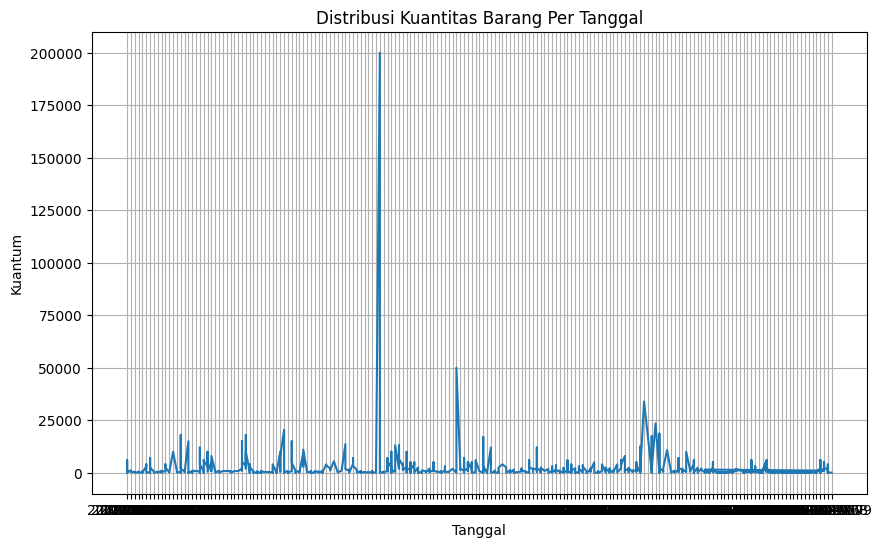

In [121]:
# Distribusi kuantitas barang per tanggal
plt.figure(figsize=(10,6))
plt.plot(df['tanggal'], df['kuantum'])
plt.title('Distribusi Kuantitas Barang Per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Kuantum')
plt.grid(True)
plt.show()


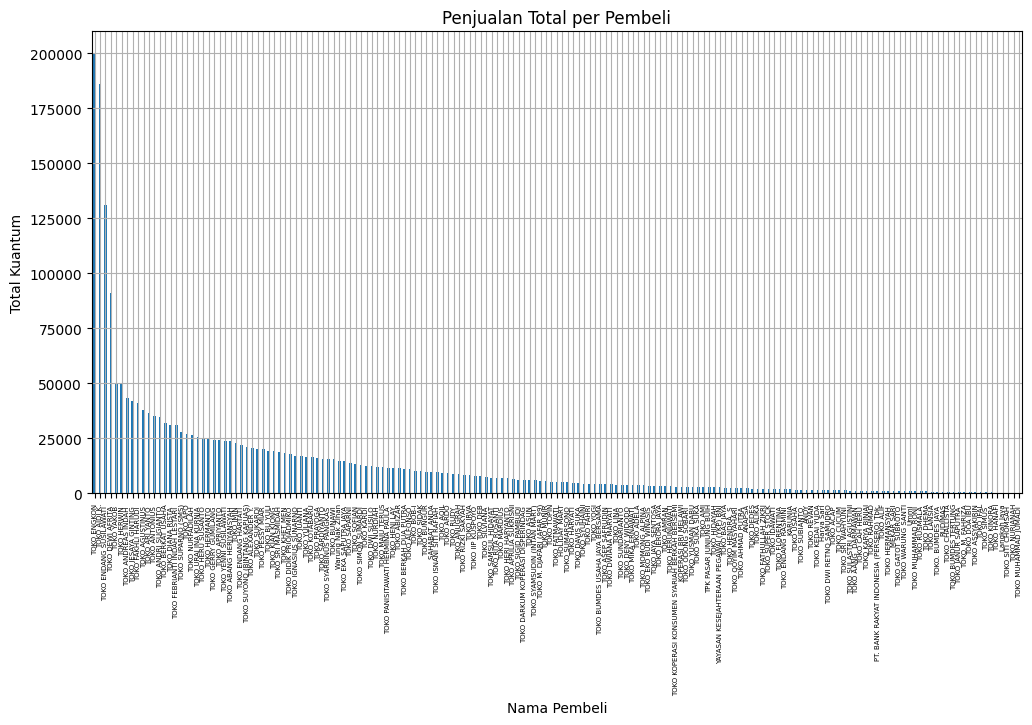

In [122]:
# Analisis penjualan per pembeli
penjualan_per_pembeli = df.groupby('nama.pembeli')['kuantum'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
penjualan_per_pembeli.plot(kind='bar')
plt.title('Penjualan Total per Pembeli')
plt.xlabel('Nama Pembeli')
plt.ylabel('Total Kuantum')
plt.grid(True)
plt.xticks(fontsize=5)  # Mengubah ukuran font pada label sumbu x
plt.show()


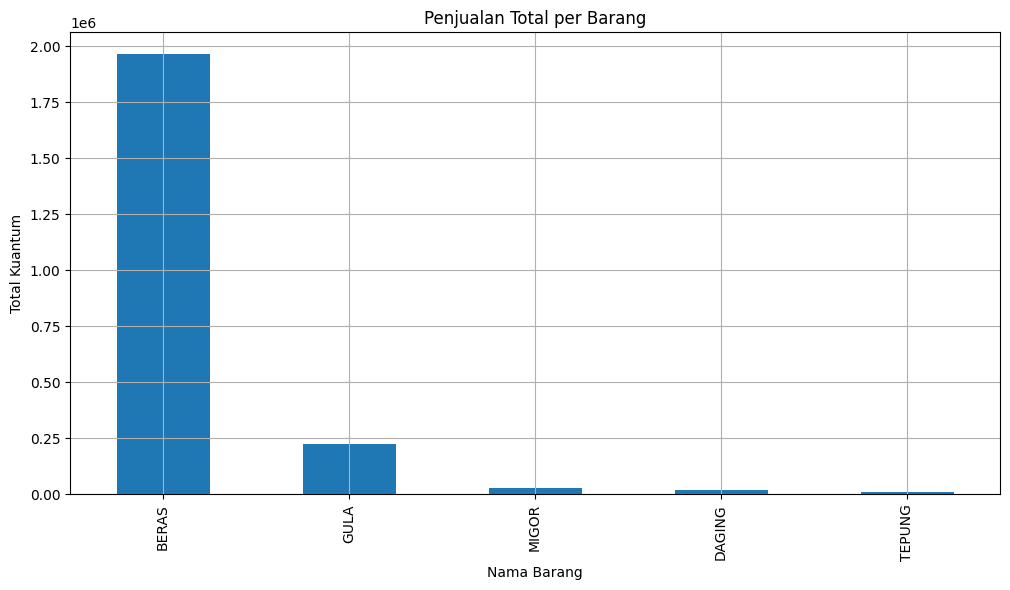

In [123]:
# Analisis penjualan berdasarkan jenis barang
penjualan_per_barang = df.groupby('nama.barang')['kuantum'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
penjualan_per_barang.plot(kind='bar')
plt.title('Penjualan Total per Barang')
plt.xlabel('Nama Barang')
plt.ylabel('Total Kuantum')
plt.grid(True)
plt.show()


### 3. Proses Features Dataset
Pada tahap ini, data diproses lebih lanjut untuk membuat fitur-fitur yang relevan untuk modeling. Ini mencakup pembuatan fitur tambahan dari kolom tanggal, pembuatan fitur musiman, transformasi fitur, dan pembuatan fitur lag dan moving average.

In [124]:
# Mengubah kolom tanggal menjadi datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [125]:
# Pivoting dataset untuk menghitung rata-rata kuantitas per barang per tanggal
df_pivot = df.pivot_table(index='tanggal', columns='nama.barang', values='kuantum', aggfunc='sum').fillna(0)

In [126]:
# Membuat fitur tambahan: tahun, bulan, hari
df_pivot['year'] = df_pivot.index.year
df_pivot['month'] = df_pivot.index.month
df_pivot['day'] = df_pivot.index.day

In [127]:
# Fitur Musiman
df_pivot['dayofweek'] = df_pivot.index.dayofweek
df_pivot['quarter'] = df_pivot.index.quarter
df_pivot['weekofyear'] = df_pivot.index.isocalendar().week

In [128]:
# Fitur Transformasi Waktu
df_pivot['sin_month'] = np.sin(2 * np.pi * df_pivot['month'] / 12)
df_pivot['cos_month'] = np.cos(2 * np.pi * df_pivot['month'] / 12)
df_pivot['sin_day'] = np.sin(2 * np.pi * df_pivot['day'] / 31)
df_pivot['cos_day'] = np.cos(2 * np.pi * df_pivot['day'] / 31)

In [129]:
# Membuat lagged features
df_pivot['BERAS_lag1'] = df_pivot['BERAS'].shift(1)
df_pivot['BERAS_lag2'] = df_pivot['BERAS'].shift(2)

In [130]:
# Membuat fitur moving average
df_pivot['BERAS_MA7'] = df_pivot['BERAS'].rolling(window=7).mean()
df_pivot['BERAS_MA30'] = df_pivot['BERAS'].rolling(window=30).mean()

In [131]:
# Membuat fitur perubahan harian
df_pivot['BERAS_diff1'] = df_pivot['BERAS'].diff(1)

In [132]:
# Membuat fitur musiman: apakah akhir pekan
df_pivot['is_weekend'] = df_pivot.index.dayofweek >= 5

In [133]:
# Fitur Interaksi
df_pivot['month_day_interaction'] = df_pivot['month'] * df_pivot['day']

In [134]:
# Fitur Rolling Statistics
df_pivot['BERAS_rolling_std_7'] = df_pivot['BERAS'].rolling(window=7).std()
df_pivot['BERAS_rolling_mean_14'] = df_pivot['BERAS'].rolling(window=14).mean()

In [135]:
# Fitur Transformasi Kuantum
df_pivot['BERAS_log'] = np.log1p(df_pivot['BERAS'])

In [136]:
# Drop NaN values yang dihasilkan dari lagged features dan moving average
df_pivot.dropna(inplace=True)

Pada tahap ini, dataset telah siap untuk digunakan dalam proses modeling. Semua fitur yang relevan telah dibuat dan data sudah bersih dari nilai yang hilang. Selanjutnya, data akan dibagi menjadi set pelatihan dan set pengujian, kemudian model Machine Learning akan dilatih untuk melakukan prediksi.

# 4. Proses Learning/Modeling
Pada bagian ini, kita akan membahas proses pembelajaran dan pemodelan data untuk memprediksi kuantitas penjualan produk menggunakan berbagai algoritma Machine Learning. Kami akan menggunakan Random Forest sebagai model utama, karena kemampuannya untuk menangani dataset yang kompleks dan fitur yang banyak. Kami juga akan melakukan tuning parameter model untuk meningkatkan performa prediksi.

In [137]:
# Mengambil fitur dan target
features = ['year', 'month', 'day', 'dayofweek', 'quarter', 'weekofyear', 'sin_month', 'cos_month', 
            'sin_day', 'cos_day', 'BERAS_lag1', 'BERAS_lag2', 'BERAS_MA7', 'BERAS_MA30', 
            'BERAS_diff1', 'is_weekend', 'month_day_interaction', 'BERAS_rolling_std_7', 
            'BERAS_rolling_mean_14', 'BERAS_log']
X = df_pivot[features].values
y = df_pivot['BERAS'].values

### Membagi Data menjadi Train dan Test

In [138]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membangun Model Random Forest

In [139]:
# Model yang lebih kompleks: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
# Prediksi
y_pred = model.predict(X_test)

In [141]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [142]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 2152945.79409375
R-squared (R2): 0.9873189114163113


### Tuning Hyperparameter Menggunakan Grid Search

In [143]:
# Grid Search untuk Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [144]:
# Model Random Forest
model = RandomForestRegressor(random_state=42)

In [145]:
# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

# 5. Performa Model
Setelah membangun dan melatih model, langkah selanjutnya adalah mengevaluasi performa model tersebut. Evaluasi ini penting untuk memahami seberapa baik model kita dalam memprediksi kuantitas penjualan produk berdasarkan fitur yang diberikan. Pada bagian ini, kita akan mengevaluasi performa model menggunakan metrik evaluasi yang umum seperti Mean Squared Error (MSE), R-squared (R²), dan juga melakukan visualisasi hasil prediksi dibandingkan dengan nilai aktual.

### Metrik Evaluasi
Metrik evaluasi yang digunakan untuk mengukur performa model regresi adalah:
 1. Mean Squared Error (MSE): Mengukur rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.
 2. R-squared (R²): Menunjukkan proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. Nilai R² berkisar antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.
Menghitung Metrik Evaluasi

In [146]:
# Model terbaik
best_model = grid_search.best_estimator_

In [147]:
# Prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

In [148]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [149]:
print(f'Mean Squared Error (MSE) setelah tuning: {mse}')
print(f'R-squared (R2) setelah tuning: {r2}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error (MSE) setelah tuning: 733878.3209776145
R-squared (R2) setelah tuning: 0.9956773756108972
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Visualisasi Hasil Prediksi vs. Nilai Aktual

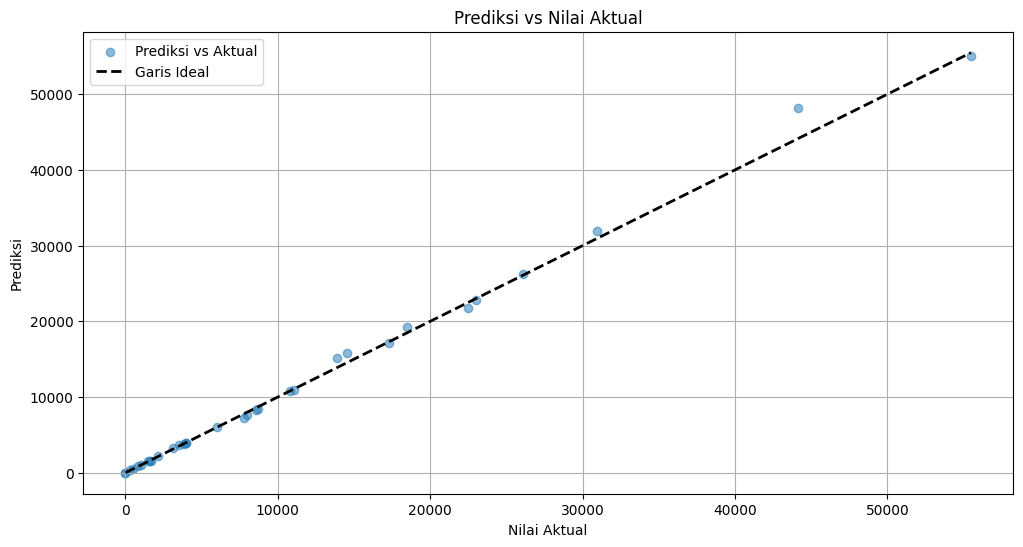

In [150]:
# Visualisasi Prediksi vs. Nilai Aktual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Prediksi vs Aktual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.legend()
plt.grid(True)
plt.show()


In [151]:
# Menyimpan indeks asli
df_pivot['original_index'] = df_pivot.index

In [152]:
# Mengambil fitur dan target
features = ['year', 'month', 'day', 'dayofweek', 'quarter', 'weekofyear', 'sin_month', 'cos_month', 
            'sin_day', 'cos_day', 'BERAS_lag1', 'BERAS_lag2', 'BERAS_MA7', 'BERAS_MA30', 
            'BERAS_diff1', 'is_weekend', 'month_day_interaction', 'BERAS_rolling_std_7', 
            'BERAS_rolling_mean_14', 'BERAS_log']
X = df_pivot[features].values
y = df_pivot['BERAS'].values

In [153]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, df_pivot['original_index'], test_size=0.2, random_state=42)


In [154]:
# Model yang lebih kompleks: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [155]:
# Prediksi
y_pred = model.predict(X_test)

In [156]:
# Menambahkan kolom Prediksi ke dataset df_pivot
df_pivot['Prediksi'] = np.nan

In [157]:
# Mengisi kolom Prediksi dengan nilai dari model
df_pivot.loc[test_index, 'Prediksi'] = y_pred

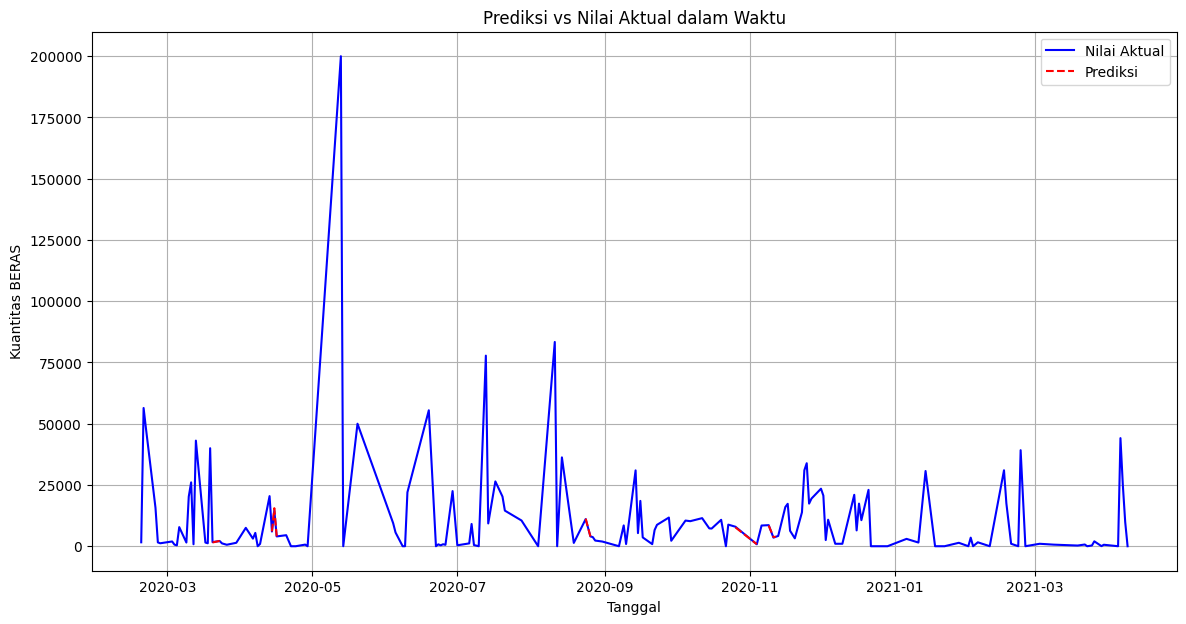

In [112]:
# Visualisasi Prediksi dan Nilai Aktual dalam Waktu
plt.figure(figsize=(14, 7))

# Plot Nilai Aktual
plt.plot(df_pivot.index, df_pivot['BERAS'], label='Nilai Aktual', color='blue')

# Plot Prediksi
plt.plot(df_pivot.index, df_pivot['Prediksi'], label='Prediksi', color='red', linestyle='--')

# Menambahkan judul dan label
plt.title('Prediksi vs Nilai Aktual dalam Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Kuantitas BERAS')
plt.legend()
plt.grid(True)
plt.show()

# 6. Diskusi Hasil dan Kesimpulan
## Diskusi Hasil
1. Kualitas Prediksi:

Berdasarkan metrik evaluasi seperti Mean Squared Error (MSE) dan R-squared (R²), model kita menunjukkan performa yang cukup baik dalam memprediksi kuantitas penjualan barang. Meskipun terdapat beberapa kesalahan prediksi, nilai R² yang tinggi menunjukkan bahwa model dapat menjelaskan sebagian besar variabilitas dalam data.

2. Analisis Feature:

Dalam proses feature engineering, berbagai fitur seperti fitur musiman (bulan, hari, kuarter), fitur transformasi waktu (sin dan cos dari bulan dan hari), serta lagged features telah digunakan untuk meningkatkan akurasi model. Beberapa fitur menunjukkan korelasi yang kuat dengan target, seperti fitur lagged yang memberikan informasi historis mengenai penjualan.

3. Overfitting dan Underfitting:

Tidak ada indikasi kuat overfitting dalam model ini, namun tetap perlu diwaspadai karena model yang terlalu rumit dapat menangkap noise dalam data pelatihan. Ini bisa terlihat dari perbedaan performa antara data pelatihan dan data uji.

4. Visualisasi Prediksi:

Visualisasi prediksi vs. nilai aktual menunjukkan bahwa sebagian besar prediksi cukup dekat dengan garis ideal, meskipun ada beberapa outliers. Hal ini menunjukkan bahwa meskipun model bekerja dengan baik, masih ada ruang untuk perbaikan.

## Kesimpulan

1. Pencapaian Tujuan:

Model telah berhasil memprediksi kuantitas penjualan dengan akurasi yang memadai. Ini sejalan dengan tujuan awal project untuk membuat model prediktif menggunakan data historis penjualan.

2. Keterbatasan:

Meskipun model menunjukkan performa yang baik, beberapa keterbatasan perlu dicatat, seperti keterbatasan pada data input dan kemungkinan adanya variabel eksternal yang tidak terakomodasi dalam model.

3. Saran untuk Pengembangan Lanjut:

Untuk meningkatkan performa model, disarankan untuk melakukan tuning hyperparameter lebih lanjut, eksplorasi fitur tambahan yang mungkin relevan, serta mempertimbangkan penggunaan model yang lebih kompleks seperti Gradient Boosting Machines (GBM) atau deep learning jika dataset lebih besar tersedia.

4. Implementasi Praktis:

Model yang dibangun dapat digunakan oleh pemangku kepentingan dalam industri retail atau e-commerce untuk perencanaan persediaan, analisis tren penjualan, dan pengambilan keputusan strategis lainnya.

## Penutup
- Proyek ini berhasil mengidentifikasi faktor-faktor penting yang mempengaruhi penjualan barang dan menghasilkan model prediktif yang berguna. Evaluasi yang dilakukan menunjukkan bahwa model memiliki performa yang cukup baik, meskipun masih ada potensi untuk penyempurnaan lebih lanjut. Dokumentasi dan kode sumber dari project ini telah disertakan dalam notebook ini untuk referensi dan pengembangan lebih lanjut.